<a href="https://colab.research.google.com/github/showmeinfinity/final_project/blob/main/Step_1_Preprocessing_data_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note that this notebook is run using Google Colab*

# Pre-process MD-Agreement datasets

In [ ]:
!pip install contractions
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import autoviz
from wordcloud import WordCloud
import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
import emoji
import html

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Set the random seed for reproducibility
np.random.seed(13)

In [ ]:
# Load the JSON data from the files
with open("MD-Agreement_test.json", "r") as file_test:
    data_test = json.load(file_test)

with open("MD-Agreement_dev.json", "r") as file_dev:
    data_dev = json.load(file_dev)

with open("MD-Agreement_train.json", "r") as file_train:
    data_train = json.load(file_train)

# Check the type and length of the loaded data to understand its structure
data_types = {
    "test": {
        "type": type(data_test),
        "length": len(data_test) if isinstance(data_test, (list, dict)) else None
    },
    "dev": {
        "type": type(data_dev),
        "length": len(data_dev) if isinstance(data_dev, (list, dict)) else None
    },
    "train": {
        "type": type(data_train),
        "length": len(data_train) if isinstance(data_train, (list, dict)) else None
    }
}

data_types

{'test': {'type': dict, 'length': 3057},
 'dev': {'type': dict, 'length': 1104},
 'train': {'type': dict, 'length': 6592}}

In [ ]:
# Combine the data from the three files into a single dictionary
combined_data = {
    "test": data_test,
    "dev": data_dev,
    "train": data_train
}

# Save the combined data to a new JSON file
output_file_path = "combined_data.json"
with open(output_file_path, "w") as output_file:
    json.dump(combined_data, output_file, indent=4)

output_file_path

'combined_data.json'

In [ ]:
# Initialise an empty list to store the dataframes from each split
dfs = []

# Loop through each split in the combined JSON data
for split_name, split_data in combined_data.items():
    # Extract the necessary fields and store them in a list
    rows = []
    for _, entry in split_data.items():
        row = {
            'text': entry['text'],
            'annotation task': entry['annotation task'],
            'number of annotations': entry['number of annotations'],
            'annotations': entry['annotations'],
            'annotators': entry['annotators'],
            'lang': entry['lang'],
            'hard_label': int(entry['hard_label']),
            'split': entry['split'],
            'soft_label.0': entry['soft_label']['0'],
            'soft_label.1': entry['soft_label']['1'],
            'other_info.domain': entry['other_info']['domain']
        }
        rows.append(row)

    # Convert the list of rows into a dataframe
    df = pd.DataFrame(rows)
    dfs.append(df)

# Concatenate the dataframes from each split
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a CSV file
output_csv_path = "combined_data.csv"
combined_df.to_csv(output_csv_path, index=False)

output_csv_path


'combined_data.csv'

Restructure the dataframe

In [ ]:
combined_df

,text,annotation task,number of annotations,annotations,annotators,lang,hard_label,split,soft_label.0,soft_label.1,other_info.domain
0,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,"1,0,0,0,0","Ann150,Ann626,Ann85,Ann789,Ann283",en,0,test,0.8,0.2,Elections2020
1,. <user> <user> <user> <user> <user> <user> #W...,offensiveness detection,5,"0,0,0,0,0","Ann633,Ann158,Ann639,Ann448,Ann283",en,0,test,1.0,0.0,BLM
2,"If you watched the entire #GeorgeFloyd porno, ...",offensiveness detection,5,"1,1,1,1,1","Ann535,Ann206,Ann229,Ann236,Ann408",en,1,test,0.0,1.0,BLM
3,<user> Stay away from children.,offensiveness detection,5,"0,0,1,1,0","Ann770,Ann538,Ann272,Ann170,Ann150",en,0,test,0.6,0.4,Elections2020
4,<user> <user> No super-spreader accusations as...,offensiveness detection,5,"1,0,1,1,1","Ann107,Ann313,Ann484,Ann283,Ann448",en,1,test,0.2,0.8,Covid-19
...,...,...,...,...,...,...,...,...,...,...,...
10748,Instead of showing compassion and empathy..thi...,offensiveness detection,5,"0,0,0,0,0","Ann740,Ann577,Ann65,Ann775,Ann681",en,0,train,1.0,0.0,BLM
10749,<user> Neither did you,offensiveness detection,5,"0,0,0,0,0","Ann88,Ann85,Ann779,Ann793,Ann656",en,0,train,1.0,0.0,Elections2020
10750,"""University of Toronto, McMaster University, S...",offensiveness detection,5,"0,0,0,0,0","Ann632,Ann517,Ann514,Ann64,Ann609",en,0,train,1.0,0.0,Covid-19
10751,The only people ripping this country apart are...,offensiveness detection,5,"0,1,1,0,0","Ann493,Ann586,Ann239,Ann347,Ann661",en,0,train,0.6,0.4,BLM


In [ ]:
# Checking for missing values
missing_values = combined_df.isnull().sum()
missing_values

text                     0
annotation task          0
number of annotations    0
annotations              0
annotators               0
lang                     0
hard_label               0
split                    0
soft_label.0             0
soft_label.1             0
other_info.domain        0
dtype: int64

In [ ]:
# Create 'instance_id' column
combined_df['instance_id'] = range(1, len(combined_df) + 1)

# Split 'annotators' and 'annotations' columns
combined_df['annotators'] = combined_df['annotators'].str.split(',')
combined_df['annotations'] = combined_df['annotations'].str.split(',')

# Check the first few rows after transformations
combined_df.head()


,text,annotation task,number of annotations,annotations,annotators,lang,hard_label,split,soft_label.0,soft_label.1,other_info.domain,instance_id
0,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,"[1, 0, 0, 0, 0]","[Ann150, Ann626, Ann85, Ann789, Ann283]",en,0,test,0.8,0.2,Elections2020,1
1,. <user> <user> <user> <user> <user> <user> #W...,offensiveness detection,5,"[0, 0, 0, 0, 0]","[Ann633, Ann158, Ann639, Ann448, Ann283]",en,0,test,1.0,0.0,BLM,2
2,"If you watched the entire #GeorgeFloyd porno, ...",offensiveness detection,5,"[1, 1, 1, 1, 1]","[Ann535, Ann206, Ann229, Ann236, Ann408]",en,1,test,0.0,1.0,BLM,3
3,<user> Stay away from children.,offensiveness detection,5,"[0, 0, 1, 1, 0]","[Ann770, Ann538, Ann272, Ann170, Ann150]",en,0,test,0.6,0.4,Elections2020,4
4,<user> <user> No super-spreader accusations as...,offensiveness detection,5,"[1, 0, 1, 1, 1]","[Ann107, Ann313, Ann484, Ann283, Ann448]",en,1,test,0.2,0.8,Covid-19,5


In [ ]:
# Check for any discrepancies in the lengths of the 'annotators' and 'annotations' columns
mismatched_rows = combined_df[combined_df['annotators'].str.len() != combined_df['annotations'].str.len()]

mismatched_rows


,text,annotation task,number of annotations,annotations,annotators,lang,hard_label,split,soft_label.0,soft_label.1,other_info.domain,instance_id
1682,"So ""vicious...despicable"" were not the officer...",offensiveness detection,5,"[0, 0, 0, 0, 1]","[Ann535, Ann158, Ann448, Ann383, Ann480, Ann579]",en,0,test,0.8,0.2,BLM,1683
2037,This World is nuts! Racism has been accepted f...,offensiveness detection,5,"[0, 0, 0, 0, 1]","[Ann535, Ann158, Ann448, Ann383, Ann480, Ann579]",en,0,test,0.8,0.2,BLM,2038


These two rows are removed as the number of annotators and number of annotations do not match

In [ ]:
# Remove the mismatched rows
combined_df = combined_df.drop(index=mismatched_rows.index)

# Attempt the explode operation and make sure there are no mismatched rows issue
try:
    md_agreement_exploded = combined_df.set_index(['instance_id', 'text', 'annotation task', 'number of annotations', 'lang', 'hard_label', 'split', 'soft_label.0', 'soft_label.1', 'other_info.domain']).apply(pd.Series.explode).reset_index()
    success = True
except ValueError as e:
    success = False
    error_message = str(e)

success, error_message if not success else "Exploded successfully."


(True, 'Exploded successfully.')

In [ ]:
# Convert the annotation scores to integer
md_agreement_exploded['annotations'] = md_agreement_exploded['annotations'].astype(int)

# Rename the columns
md_agreement_exploded = md_agreement_exploded.rename(columns={"annotators": "user_id", "annotations": "offensiveness"})

# Modify the 'user_id' column to extract the numerical part
md_agreement_exploded['user_id'] = md_agreement_exploded['user_id'].str.extract('(\d+)')

# Display the first few rows of the modified data
md_agreement_exploded

,instance_id,text,annotation task,number of annotations,lang,hard_label,split,soft_label.0,soft_label.1,other_info.domain,offensiveness,user_id
0,1,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,en,0,test,0.8,0.2,Elections2020,1,150
1,1,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,en,0,test,0.8,0.2,Elections2020,0,626
2,1,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,en,0,test,0.8,0.2,Elections2020,0,85
3,1,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,en,0,test,0.8,0.2,Elections2020,0,789
4,1,"<user> <user> 30 million unemployed , fool",offensiveness detection,5,en,0,test,0.8,0.2,Elections2020,0,283
...,...,...,...,...,...,...,...,...,...,...,...,...
53750,10753,"Facts!!! #Repost miss_pr_piggy ・・・ ""Gen Z wil...",offensiveness detection,5,en,0,train,1.0,0.0,BLM,0,117
53751,10753,"Facts!!! #Repost miss_pr_piggy ・・・ ""Gen Z wil...",offensiveness detection,5,en,0,train,1.0,0.0,BLM,0,513
53752,10753,"Facts!!! #Repost miss_pr_piggy ・・・ ""Gen Z wil...",offensiveness detection,5,en,0,train,1.0,0.0,BLM,0,755
53753,10753,"Facts!!! #Repost miss_pr_piggy ・・・ ""Gen Z wil...",offensiveness detection,5,en,0,train,1.0,0.0,BLM,0,455


In [ ]:
md_agreement_exploded.to_csv("md_agreement_transformed.csv", index=False)

## Do some EDA

In [ ]:
def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(md_agreement_exploded, *['split', 'other_info.domain'], **{})
chart

Text(0.5, 1.0, 'Distribution of Text Lengths')

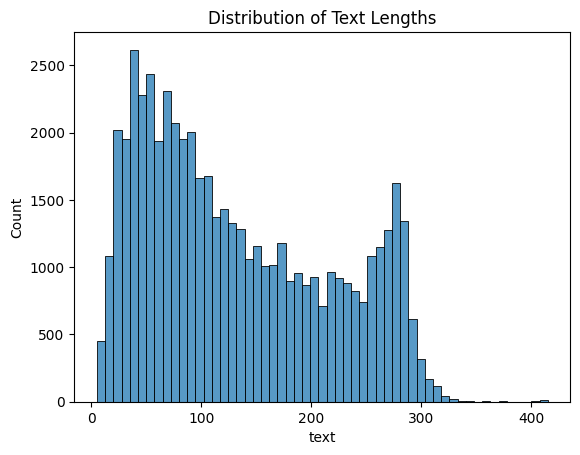

In [ ]:
# Plot the distribution of text lengths
text_lengths = md_agreement_exploded['text'].apply(len)
sns.histplot(text_lengths)
plt.title("Distribution of Text Lengths")

In [ ]:
# Display the distribution of offensiveness column
def plot_offensiveness_distribution(df):
    plt.figure(figsize=(8, 6))
    plt.hist(df['offensiveness'], edgecolor='k')
    plt.xlabel('Offensiveness Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Offensiveness Score')
    plt.grid(True)
    plt.show()

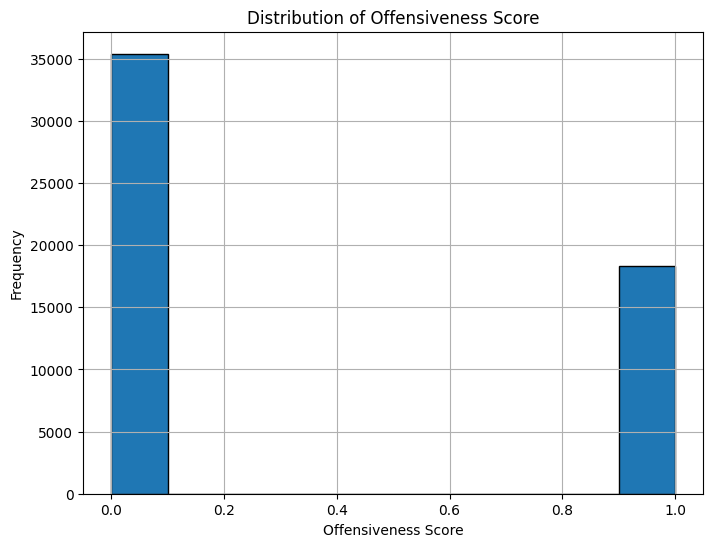

In [ ]:
# Plot distribution for md_agreement
plot_offensiveness_distribution(md_agreement_exploded)

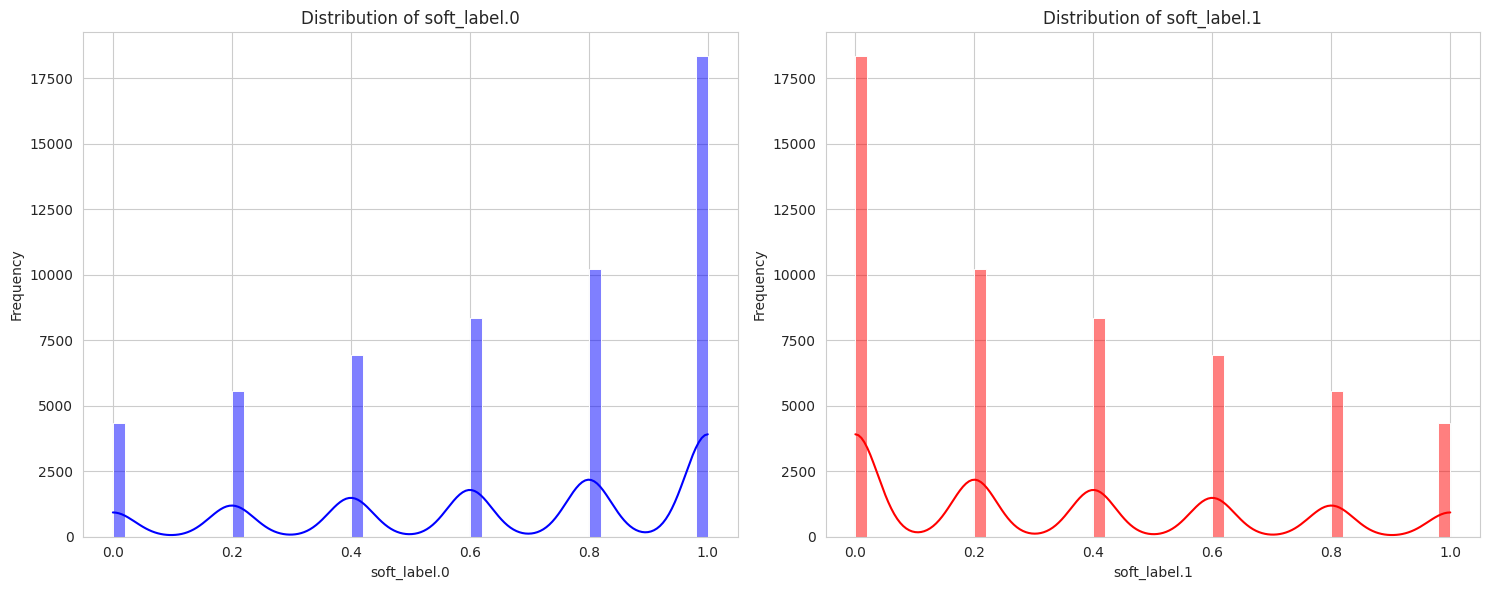

In [ ]:
# Set up the plotting style
sns.set_style("whitegrid")

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the distribution of soft_label.0
sns.histplot(md_agreement_exploded['soft_label.0'], ax=axes[0], kde=True, bins=50, color='blue')
axes[0].set_title('Distribution of soft_label.0')
axes[0].set_xlabel('soft_label.0')
axes[0].set_ylabel('Frequency')

# Plot the distribution of soft_label.1
sns.histplot(md_agreement_exploded['soft_label.1'], ax=axes[1], kde=True, bins=50, color='red')
axes[1].set_title('Distribution of soft_label.1')
axes[1].set_xlabel('soft_label.1')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

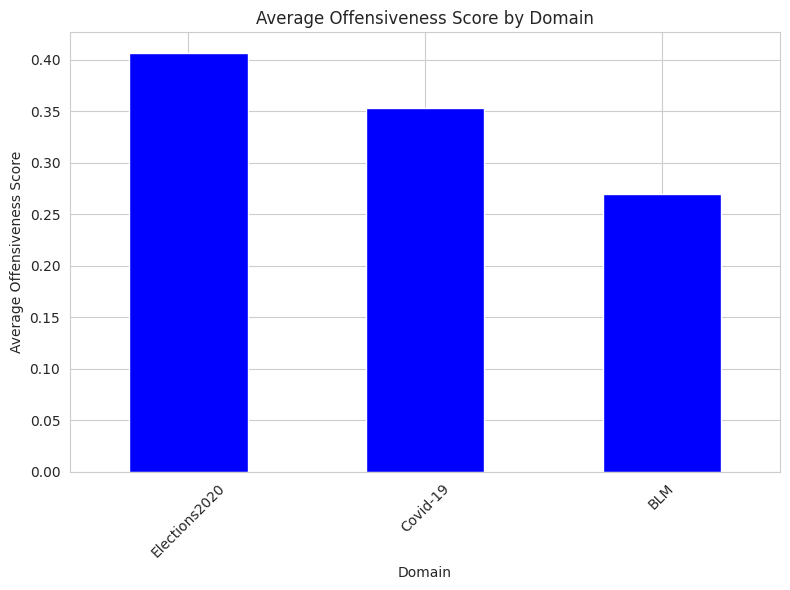

In [ ]:
# Group by domain and calculate the mean offensiveness score
avg_offensiveness_by_domain = md_agreement_exploded.groupby('other_info.domain')['offensiveness'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
avg_offensiveness_by_domain.plot(kind='bar', color='blue')
plt.title("Average Offensiveness Score by Domain")
plt.ylabel("Average Offensiveness Score")
plt.xlabel("Domain")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

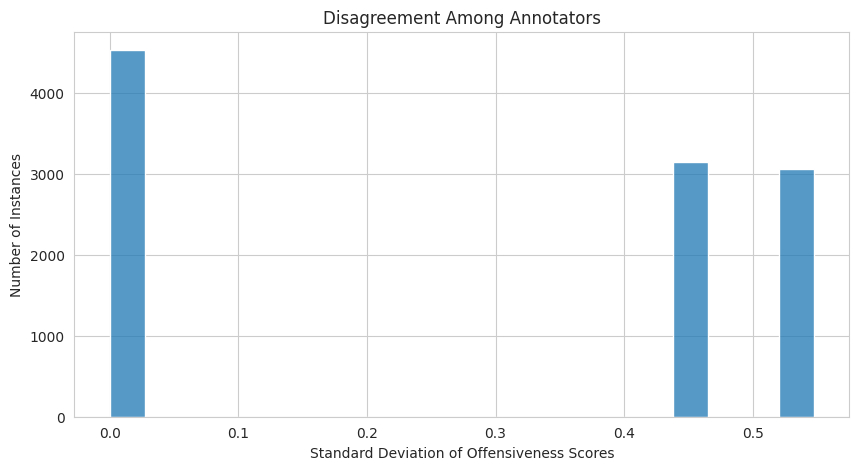

In [ ]:
# Compute the standard deviation of the offensiveness scores for each instance
disagreement = md_agreement_exploded.groupby('instance_id')['offensiveness'].std()

# Create a histogram of the disagreement scores
plt.figure(figsize=(10, 5))
sns.histplot(disagreement, bins=20)
plt.title("Disagreement Among Annotators")
plt.xlabel("Standard Deviation of Offensiveness Scores")
plt.ylabel("Number of Instances")
plt.show()


# Pre-process offensiveness POPQUORN daatset

In [ ]:
offensiveness_popquorn = pd.read_csv('offensiveness_popquorn.csv')

In [ ]:
offensiveness_popquorn

,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education
0,530,0,"I think a lot of Dethklok songs use drop C, wo...",1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
1,1280,0,There are relatively simple ways around all of...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
2,621,0,Tell the british soldier in WW1 to shoot that ...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
3,676,0,Top comment pretty much. I have gay friends an...,1.0,Man,White,35-39,Unemployed,High school diploma or equivalent
4,635,0,Don't tell them just let them and their liniag...,3.0,Man,White,35-39,Unemployed,High school diploma or equivalent
...,...,...,...,...,...,...,...,...,...
13031,471,262,They’re closed anti-vaxx Facebook groups. When...,1.0,Woman,Asian,54-59,Self-employed,College degree
13032,1033,262,Bioethics; an interesting field in which the w...,1.0,Woman,Asian,54-59,Self-employed,College degree
13033,740,262,Or they are really secure but hang around inse...,5.0,Woman,Asian,54-59,Self-employed,College degree
13034,894,262,Don't have to worry about being too big to fit...,4.0,Woman,Asian,54-59,Self-employed,College degree


In [ ]:
# Checking for missing values
missing_values = offensiveness_popquorn.isnull().sum()
missing_values

instance_id      0
user_id          0
text             0
offensiveness    0
gender           0
race             0
age              0
occupation       0
education        0
dtype: int64

## Do some EDA

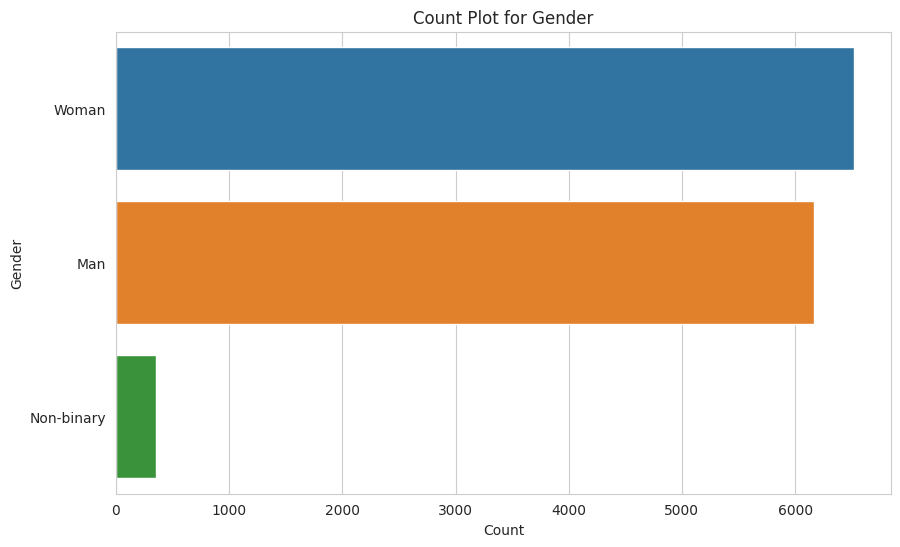

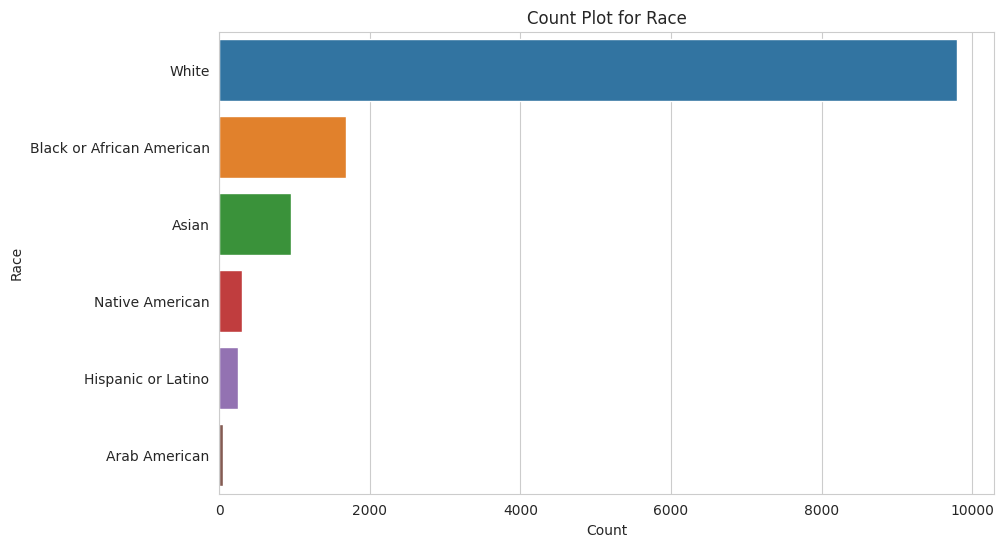

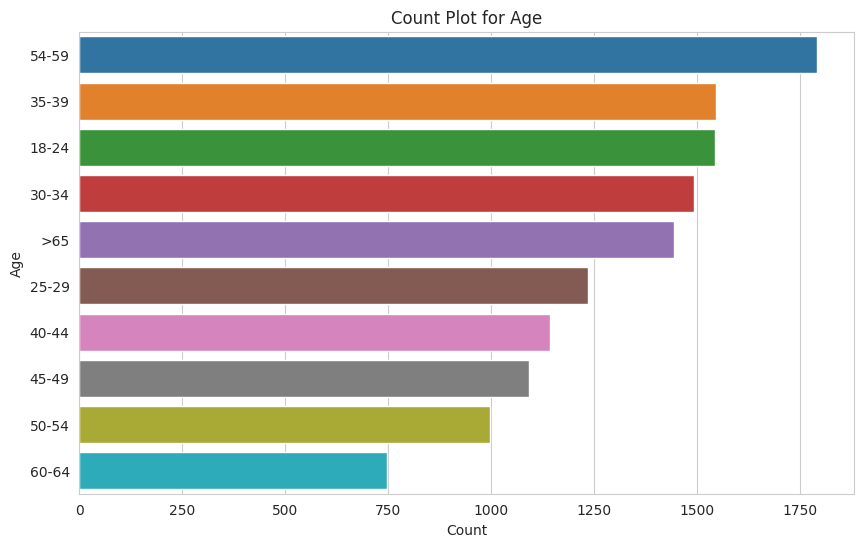

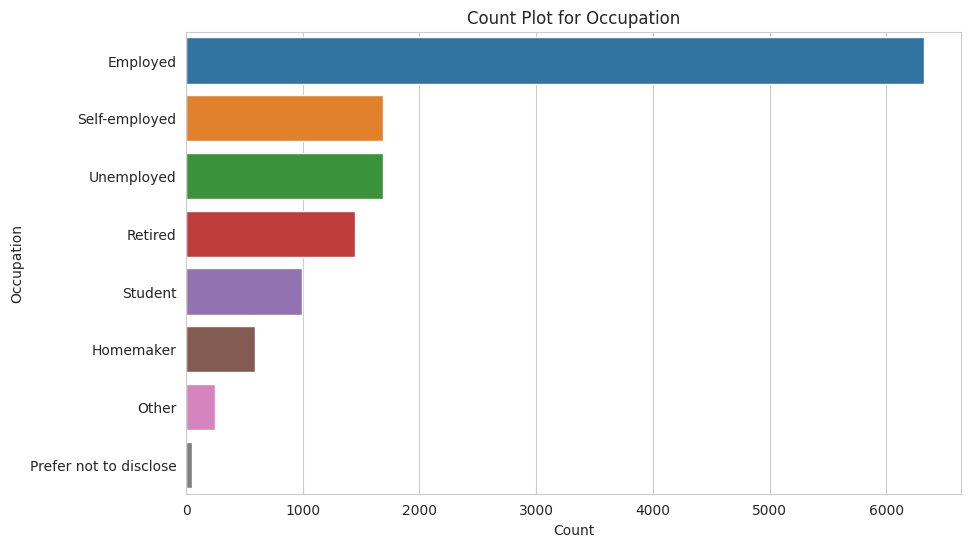

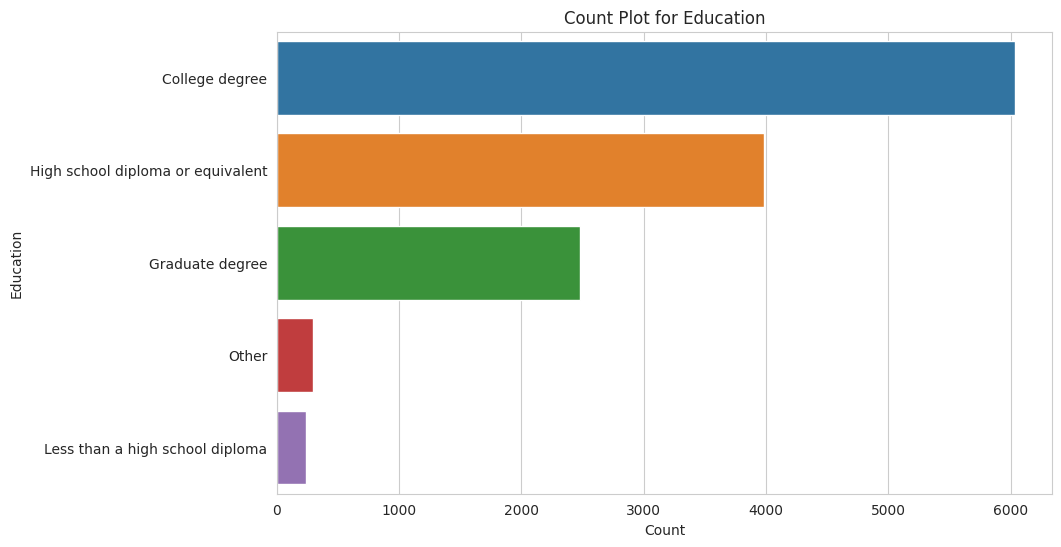

In [ ]:
#### Show split of offensiveness, gender, race, age, occupation, education

# Function to plot count plot for a given column
def plot_count(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=offensiveness_popquorn, y=column, order=offensiveness_popquorn[column].value_counts().index)
    plt.title(f'Count Plot for {column.capitalize()}')
    plt.xlabel('Count')
    plt.ylabel(column.capitalize())
    plt.show()

# Columns to plot
columns_to_plot = ['gender', 'race', 'age', 'occupation', 'education']

# Plot count plots for the columns
for column in columns_to_plot:
    plot_count(column)

In [ ]:
# Calculate the average offensiveness score for each user
average_offensiveness = offensiveness_popquorn.groupby('user_id')['offensiveness'].mean().reset_index()
average_offensiveness

,user_id,offensiveness
0,0,1.46000
1,1,1.55102
2,2,2.02000
3,3,1.48000
4,4,2.02000
...,...,...
257,257,2.32000
258,258,3.28000
259,259,1.06000
260,261,1.20000


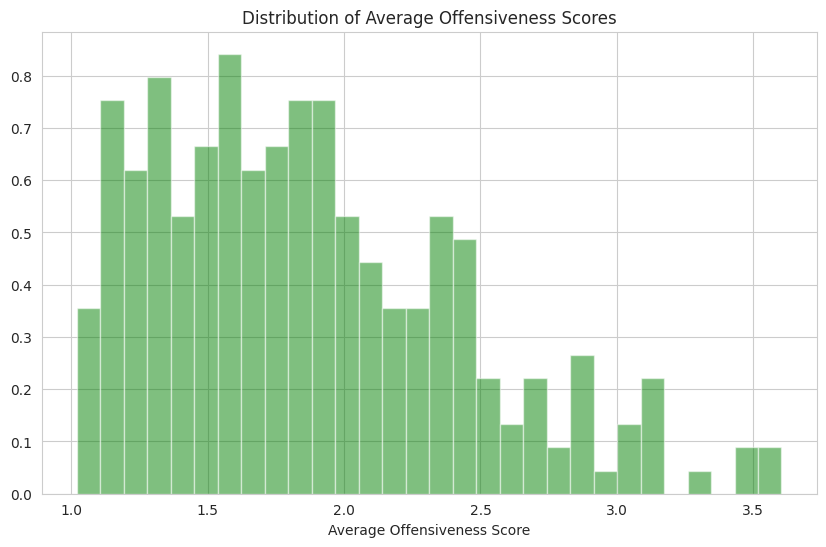

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(average_offensiveness['offensiveness'], bins=30, alpha=0.5, color='g', density=True)
plt.xlabel('Average Offensiveness Score')
plt.title('Distribution of Average Offensiveness Scores')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distribution of Text Lengths')

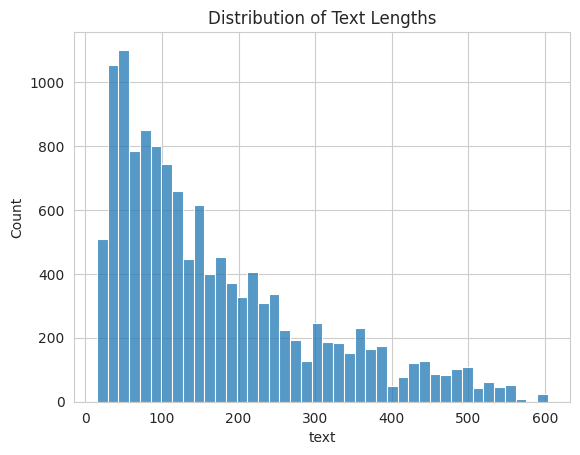

In [ ]:
# Plot the distribution of text lengths
text_lengths = offensiveness_popquorn['text'].apply(len)
sns.histplot(text_lengths)
plt.title("Distribution of Text Lengths")

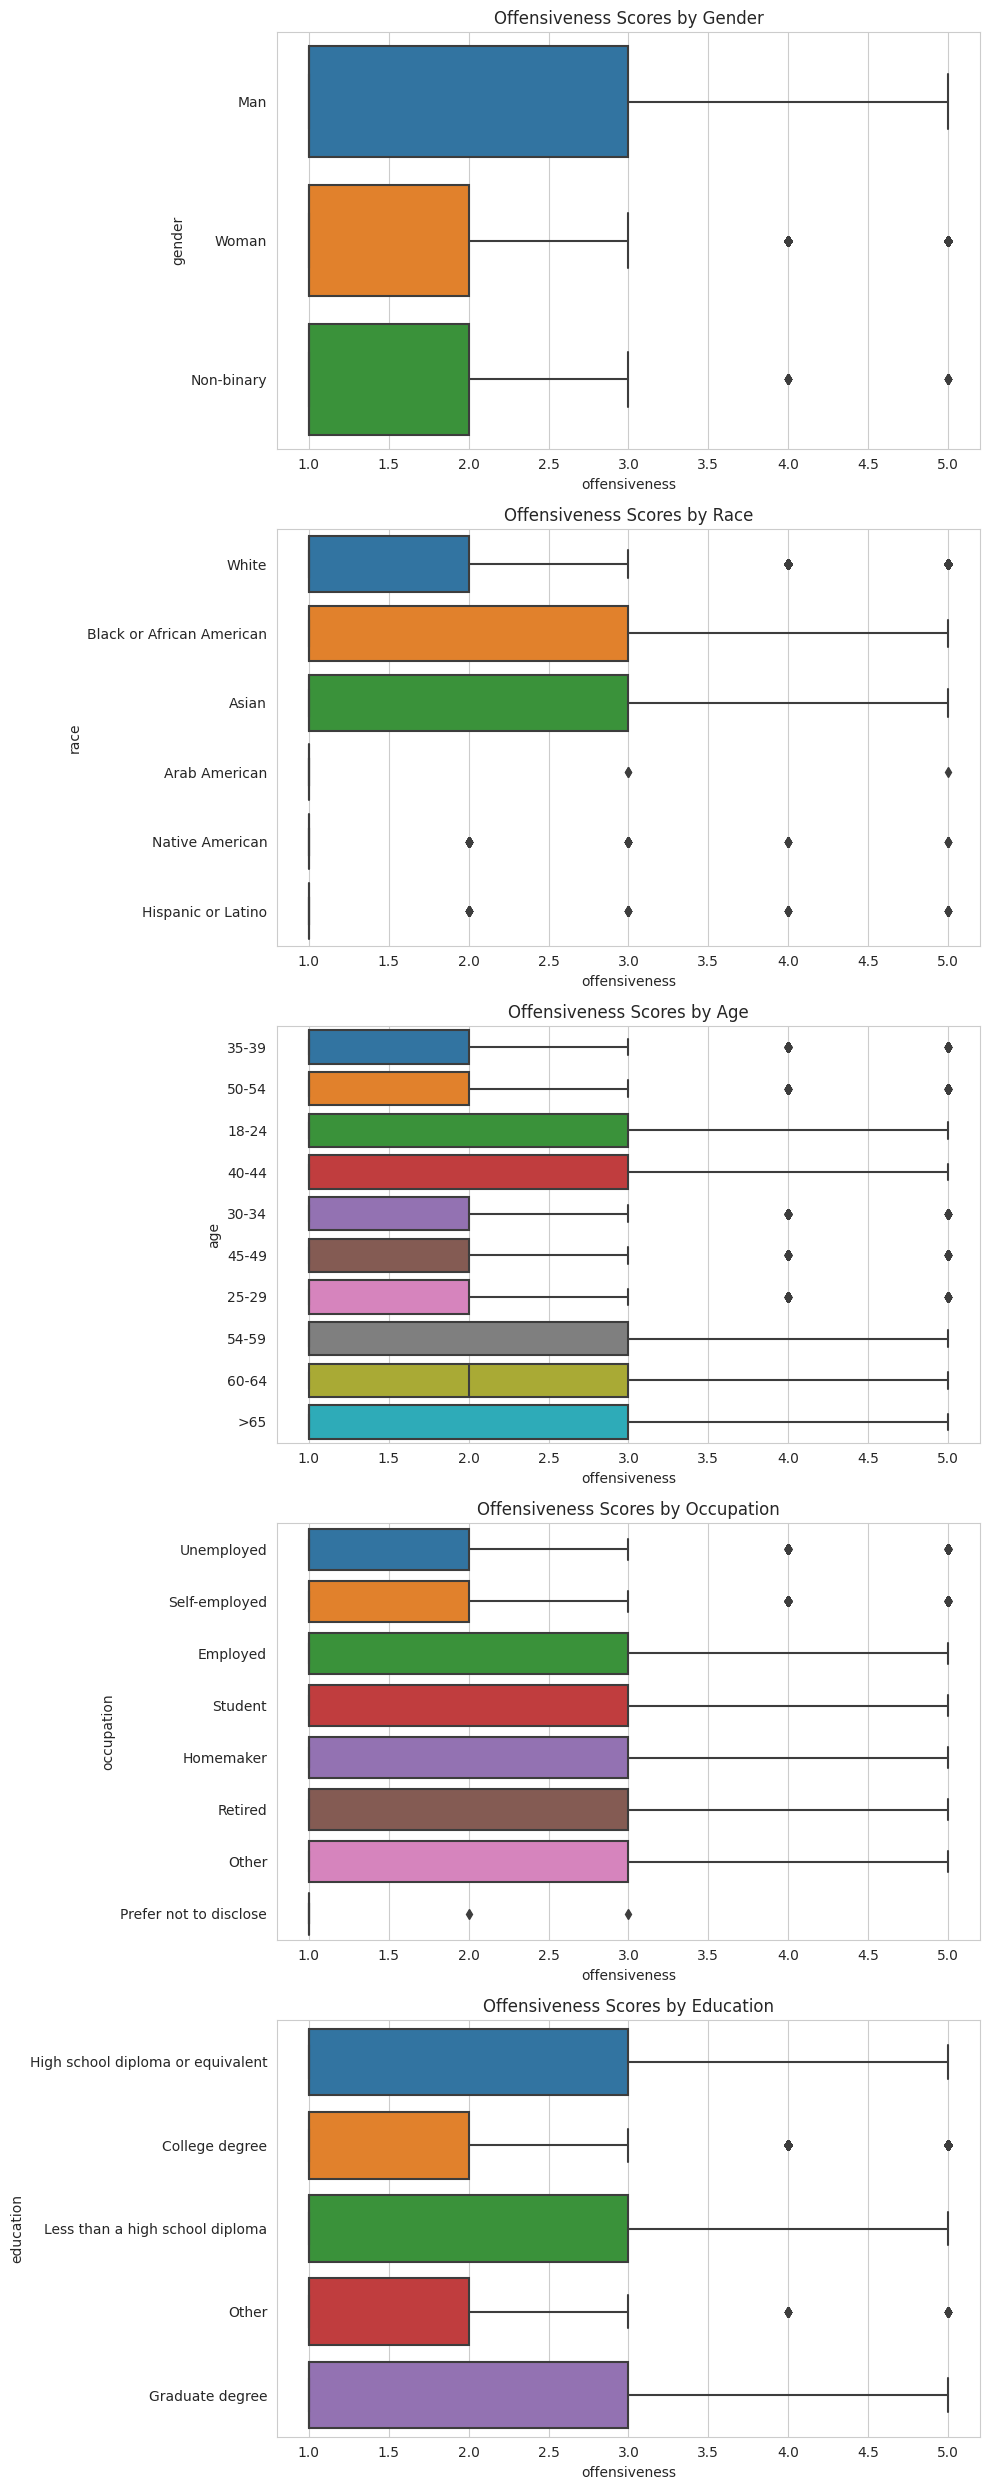

In [ ]:
# Analysing the relationship between the offensiveness score and the demographic attributes

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# List of demographic attributes
demographics = ['gender', 'race', 'age', 'occupation', 'education']

# Generate boxplots for each demographic attribute
for i, demographic in enumerate(demographics):
    sns.boxplot(y=demographic, x="offensiveness", data=offensiveness_popquorn, ax=axs[i], orient='h')
    axs[i].set_title(f"Offensiveness Scores by {demographic.capitalize()}")

plt.tight_layout()
plt.show()


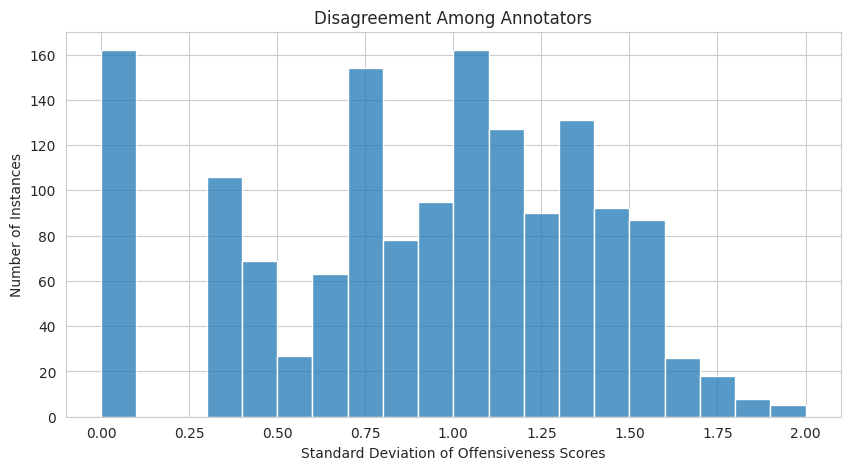

In [ ]:
# Compute the standard deviation of the offensiveness scores for each instance
disagreement = offensiveness_popquorn.groupby('instance_id')['offensiveness'].std()

# Create a histogram of the disagreement scores
plt.figure(figsize=(10, 5))
sns.histplot(disagreement, bins=20)
plt.title("Disagreement Among Annotators")
plt.xlabel("Standard Deviation of Offensiveness Scores")
plt.ylabel("Number of Instances")
plt.show()


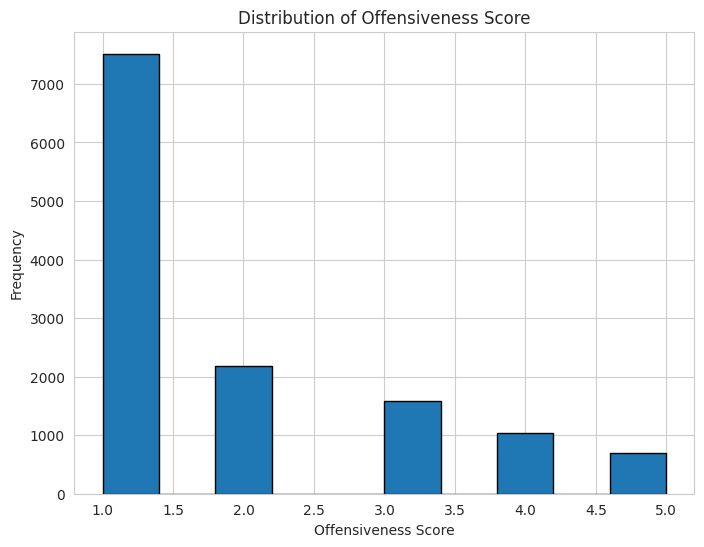

In [ ]:
# Plot distribution for 'offensiveness_popquorn' dataframe
plot_offensiveness_distribution(offensiveness_popquorn)

## Combine offensiveness scores to have a binary split for and to have more equal classes

In [ ]:
# Convert offensiveness scores to binary format
offensiveness_popquorn['offensiveness'] = offensiveness_popquorn['offensiveness'].replace({1: 0, 2: 1, 3: 1, 4: 1, 5: 1})

In [ ]:
def plot_grouped_offensiveness_distribution(df, df_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='offensiveness')
    plt.title(f"Distribution of 'offensiveness' in {df_name}")
    plt.show()

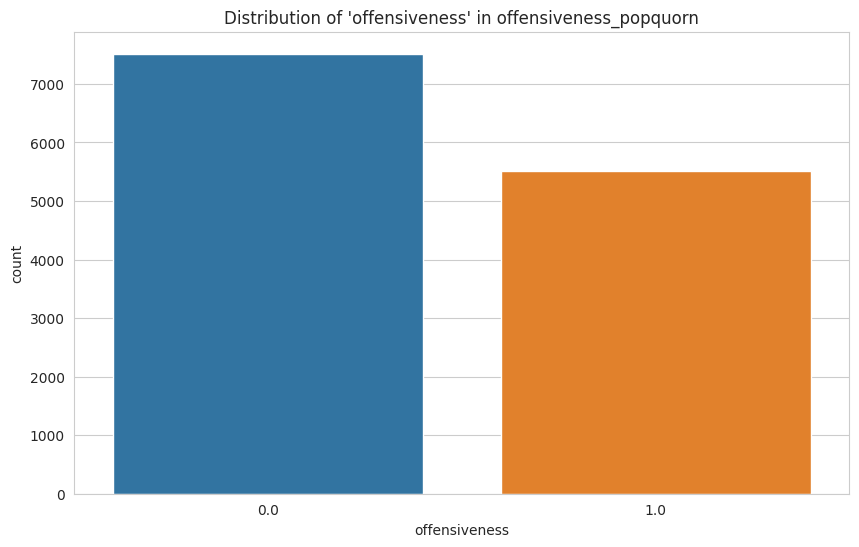

In [ ]:
plot_grouped_offensiveness_distribution(offensiveness_popquorn, 'offensiveness_popquorn')

## Create hard and soft labels for offensiveness_popquorn

In [ ]:
# Compute the count of 0s and 1s for each instance
count_0s = offensiveness_popquorn.groupby('instance_id')['offensiveness'].apply(lambda x: (x == 0).sum()).reset_index(name='count_0s')
count_1s = offensiveness_popquorn.groupby('instance_id')['offensiveness'].apply(lambda x: (x == 1).sum()).reset_index(name='count_1s')

# Merge the two counts
counts_df = pd.merge(count_0s, count_1s, on='instance_id')

# Identify instances with ties
ties_df = counts_df[counts_df['count_0s'] == counts_df['count_1s']]

ties_df

,instance_id,count_0s,count_1s
0,0,4,4
4,4,5,5
6,6,4,4
27,27,4,4
108,108,4,4
...,...,...,...
1432,1432,4,4
1491,1491,4,4
1495,1495,4,4
1498,1498,5,5


In [ ]:
len(ties_df)

85

In [ ]:
# Compute hard label for each instance
def compute_hard_label(x):
    if x.name in ties_df['instance_id'].values:
        return 1
    else:
        return 0 if (x == 0).sum() > (x == 1).sum() else 1

hard_labels = offensiveness_popquorn.groupby('instance_id')['offensiveness'].agg(compute_hard_label).reset_index(name='hard_label')

In [ ]:
# Compute soft labels (probabilities) for each instance
soft_labels_0 = offensiveness_popquorn.groupby('instance_id')['offensiveness'].apply(lambda x: (x == 0).mean()).reset_index(name='soft_label.0')
soft_labels_1 = 1 - soft_labels_0['soft_label.0']

# Add soft labels to the dataframe
soft_labels_0['soft_label.1'] = soft_labels_1

# Merge hard and soft labels with the main dataframe
merged_df = offensiveness_popquorn.merge(hard_labels, on='instance_id').merge(soft_labels_0, on='instance_id')

merged_df


,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education,hard_label,soft_label.0,soft_label.1
0,530,0,"I think a lot of Dethklok songs use drop C, wo...",0.0,Man,White,35-39,Unemployed,High school diploma or equivalent,0,0.875000,0.125000
1,530,43,"I think a lot of Dethklok songs use drop C, wo...",0.0,Man,White,35-39,Employed,Graduate degree,0,0.875000,0.125000
2,530,93,"I think a lot of Dethklok songs use drop C, wo...",0.0,Man,White,30-34,Employed,High school diploma or equivalent,0,0.875000,0.125000
3,530,111,"I think a lot of Dethklok songs use drop C, wo...",0.0,Woman,White,40-44,Employed,High school diploma or equivalent,0,0.875000,0.125000
4,530,125,"I think a lot of Dethklok songs use drop C, wo...",0.0,Man,White,18-24,Employed,College degree,0,0.875000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
13031,1151,109,Woman's studies is a pretty ridiculous field.,0.0,Woman,Asian,35-39,Employed,Graduate degree,1,0.285714,0.714286
13032,1151,121,Woman's studies is a pretty ridiculous field.,0.0,Woman,White,50-54,Prefer not to disclose,High school diploma or equivalent,1,0.285714,0.714286
13033,1151,166,Woman's studies is a pretty ridiculous field.,1.0,Woman,White,54-59,Homemaker,High school diploma or equivalent,1,0.285714,0.714286
13034,1151,213,Woman's studies is a pretty ridiculous field.,1.0,Man,Native American,54-59,Employed,High school diploma or equivalent,1,0.285714,0.714286


In [ ]:
# Check if the sum of soft_label.0 and soft_label.1 equals 1 for each instance
check_sum = merged_df.groupby('instance_id').apply(lambda x: x['soft_label.0'].iloc[0] + x['soft_label.1'].iloc[0]).reset_index(name='sum_labels')
instances_not_equal_one = check_sum[check_sum['sum_labels'] != 1]

instances_not_equal_one

,instance_id,sum_labels


In [ ]:
merged_df.to_csv("offensiveness_popquorn_transformed.csv", index=False)

# Clean text

All functions have been run to create the wordcloud but unnecessary steps hashed out for BERT

BERT needs expansion of contractions

In [ ]:
## Download the NLTK stopwords dataset
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) # NOTE: BERT can handle stopwords

def clean_text(text, remove_numbers=True, remove_punctuation=True, remove_stopwords=True):

    text = text.lower()  # Convert text to lowercase

    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # Remove HTML tags
    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub(r'', text)

    text = contractions.fix(text)  # Expand contractions
    text = html.unescape(text)  # Convert HTML entities to their actual representation

    # Remove numbers if the flag is set to True
    if remove_numbers:
        text = re.sub(r'\d+', '', text)

    # Remove punctuation if the flag is set to True
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert emojis to text
    text = emoji.demojize(text)

    # Stop word removal if the flag is set to True
    if remove_stopwords:
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = ' '.join(words)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
md_agreement_exploded['cleaned_text'] = md_agreement_exploded['text'].apply(clean_text)
merged_df['cleaned_text'] = merged_df['text'].apply(clean_text)

## Wordcloud

In [ ]:
def generate_wordcloud(data, label_score):

    # Filter data for the specified hard_label score
    filtered_texts = data[data['hard_label'] == label_score]['cleaned_text'].str.cat(sep=' ')

    # Generate a word cloud
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(['user']),
                          min_font_size = 10).generate(filtered_texts)

    # Get the list of words from the word cloud
    words_list = list(wordcloud.words_.keys())

    # Plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(f"Word Cloud for Offensiveness = {label_score}")
    plt.show()

    return words_list

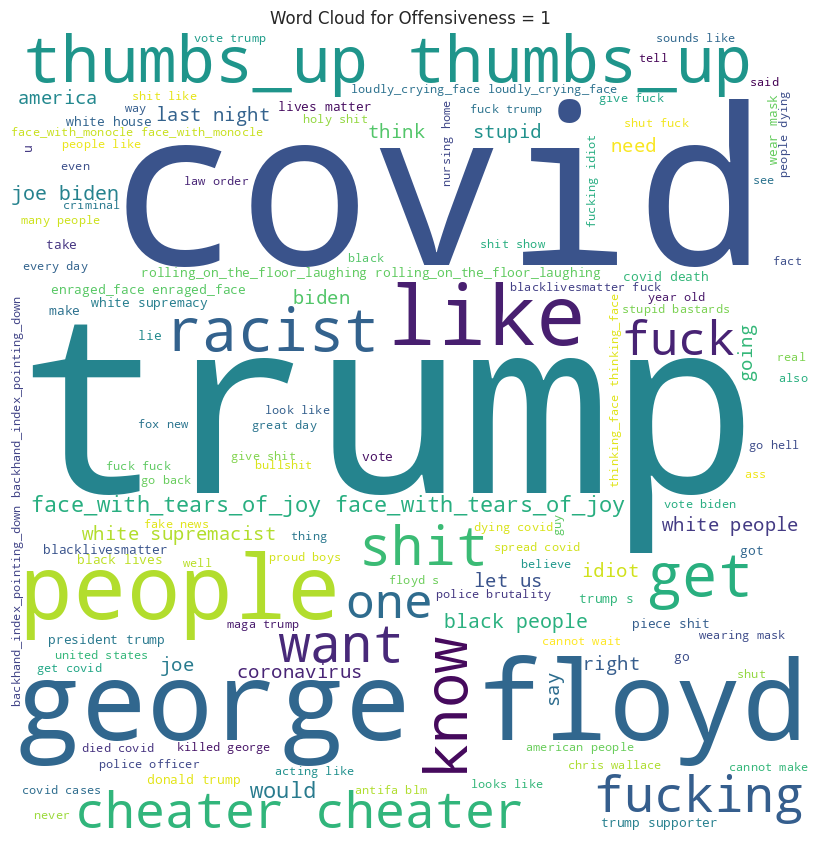

['trump', 'covid', 'george floyd', 'people', 'like', 'thumbs_up thumbs_up', 'get', 'racist', 'know', 'shit', 'want', 'fucking', 'cheater cheater', 'one', 'fuck', 'face_with_tears_of_joy face_with_tears_of_joy', 'would', 'joe biden', 'black people', 'white supremacist', 'let us', 'biden', 'idiot', 'think', 'say', 'joe', 'right', 'stupid', 'last night', 'coronavirus', 'going', 'america', 'need', 'white people', 'rolling_on_the_floor_laughing rolling_on_the_floor_laughing', 'white house', 'lives matter', 'donald trump', 'make', 'lie', 'go', 'blacklivesmatter', 'u', 'wear mask', 'covid death', 'black lives', 'piece shit', 'enraged_face enraged_face', 'vote', 'president trump', 'white supremacy', 'take', 'trump s', 'trump supporter', 'got', 'proud boys', 'looks like', 'guy', 'even', 'american people', 'wearing mask', 'shut fuck', 'thing', 'shut', 'well', 'get covid', 'united states', 'give shit', 'face_with_monocle face_with_monocle', 'ass', 'said', 'also', 'many people', 'loudly_crying_fac

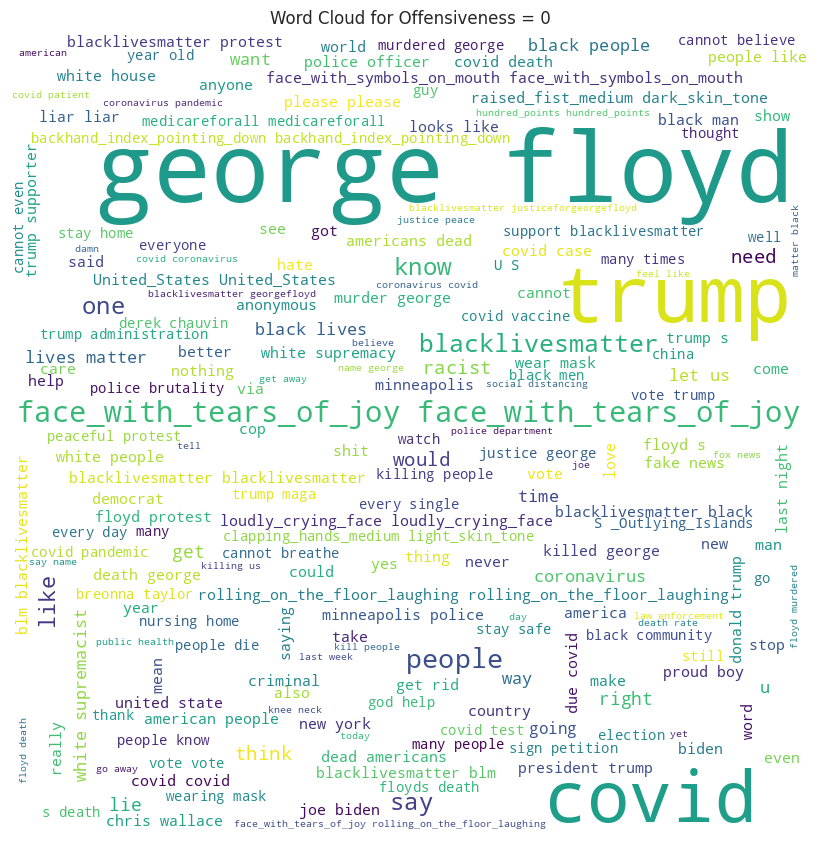

['george floyd', 'trump', 'covid', 'face_with_tears_of_joy face_with_tears_of_joy', 'people', 'blacklivesmatter', 'one', 'know', 'say', 'like', 'need', 'think', 'racist', 'would', 'right', 'get', 'lie', 'u', 'coronavirus', 'white supremacist', 'let us', 'time', 'lives matter', 'black people', 'black lives', 'want', 'way', 'going', 'america', 'United_States United_States', 'said', 'see', 'biden', 'floyd s', 'thing', 'joe biden', 'make', 'raised_fist_medium dark_skin_tone', 'even', 'covid covid', 'last night', 'american people', 'rolling_on_the_floor_laughing rolling_on_the_floor_laughing', 'please please', 'got', 'trump s', 'cannot', 'wear mask', 'hate', 'white people', 'trump supporter', 'white supremacy', 'donald trump', 'covid death', 'democrat', 'united state', 'come', 'black man', 'liar liar', 'stop', 'mean', 'americans dead', 'cop', 'man', 'white house', 'nothing', 'vote', 'care', 'take', 'president trump', 'fake news', 'world', 'blacklivesmatter blacklivesmatter', 'love', 'floyd 

In [ ]:
words_md_1 = generate_wordcloud(md_agreement_exploded, 1)
print(words_md_1)

words_md_0 = generate_wordcloud(md_agreement_exploded, 0)
print(words_md_0)

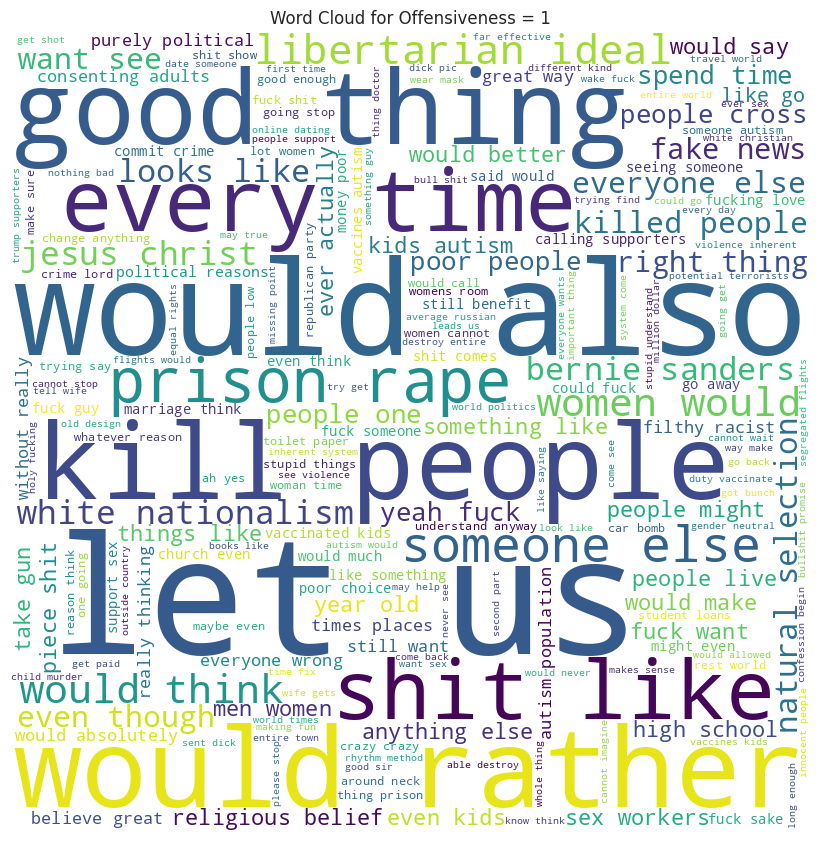

['let us', 'would also', 'would rather', 'kill people', 'good thing', 'every time', 'shit like', 'prison rape', 'someone else', 'libertarian ideal', 'would think', 'women would', 'white nationalism', 'jesus christ', 'looks like', 'bernie sanders', 'natural selection', 'killed people', 'want see', 'everyone else', 'even though', 'right thing', 'fake news', 'people cross', 'yeah fuck', 'spend time', 'poor people', 'people one', 'religious belief', 'year old', 'things like', 'kids autism', 'fuck want', 'men women', 'would make', 'people might', 'sex workers', 'something like', 'would say', 'even kids', 'would better', 'anything else', 'piece shit', 'ever actually', 'people live', 'take gun', 'high school', 'like go', 'consenting adults', 'still want', 'believe great', 'great way', 'times places', 'purely political', 'would absolutely', 'autism population', 'everyone wrong', 'filthy racist', 'without really', 'really thinking', 'political reasons', 'calling supporters', 'vaccinated kids', 

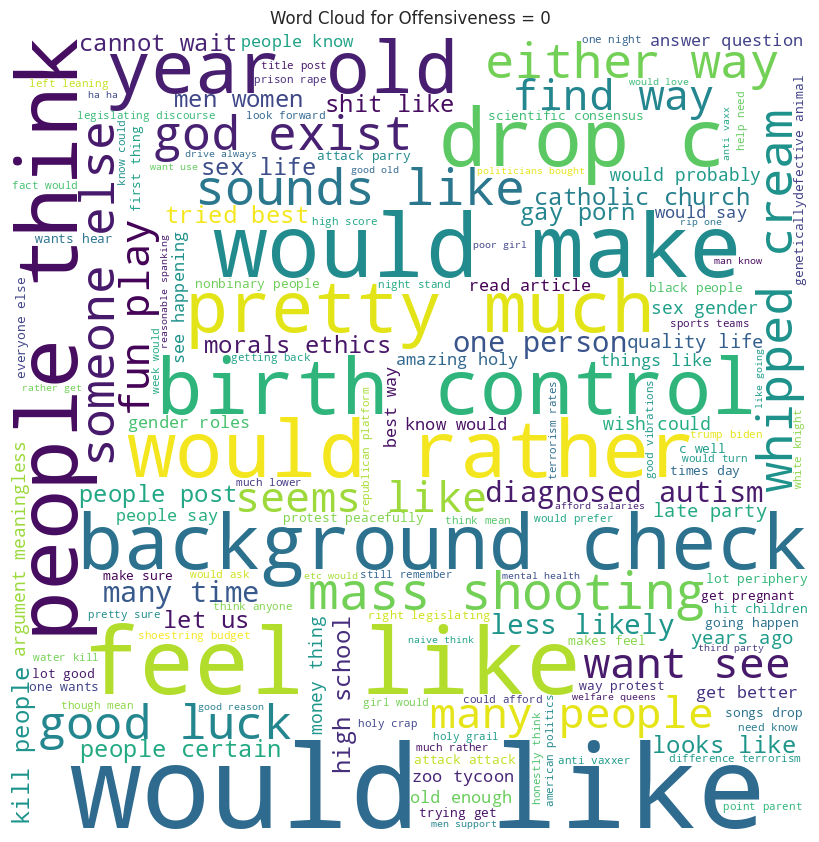

['george floyd', 'trump', 'covid', 'face_with_tears_of_joy face_with_tears_of_joy', 'people', 'blacklivesmatter', 'one', 'know', 'say', 'like', 'need', 'think', 'racist', 'would', 'right', 'get', 'lie', 'u', 'coronavirus', 'white supremacist', 'let us', 'time', 'lives matter', 'black people', 'black lives', 'want', 'way', 'going', 'america', 'United_States United_States', 'said', 'see', 'biden', 'floyd s', 'thing', 'joe biden', 'make', 'raised_fist_medium dark_skin_tone', 'even', 'covid covid', 'last night', 'american people', 'rolling_on_the_floor_laughing rolling_on_the_floor_laughing', 'please please', 'got', 'trump s', 'cannot', 'wear mask', 'hate', 'white people', 'trump supporter', 'white supremacy', 'donald trump', 'covid death', 'democrat', 'united state', 'come', 'black man', 'liar liar', 'stop', 'mean', 'americans dead', 'cop', 'man', 'white house', 'nothing', 'vote', 'care', 'take', 'president trump', 'fake news', 'world', 'blacklivesmatter blacklivesmatter', 'love', 'floyd 

In [ ]:
words_op_1 = generate_wordcloud(merged_df, 1)
print(words_op_1)

words_op_0 = generate_wordcloud(merged_df, 0)
print(words_md_0)

In [ ]:
md_agreement_exploded['cleaned_text'] = md_agreement_exploded['text'].apply(clean_text, remove_numbers=False, remove_punctuation=False, remove_stopwords=False)
md_agreement_exploded['cleaned_domain'] = md_agreement_exploded['other_info.domain'].apply(clean_text, remove_numbers=False, remove_punctuation=False, remove_stopwords=False)
merged_df['cleaned_text'] = merged_df['text'].apply(clean_text, remove_numbers=False, remove_punctuation=False, remove_stopwords=False)

In [ ]:
md_agreement_exploded[['text','cleaned_text']].head(25)

,text,cleaned_text
0,"<user> <user> 30 million unemployed , fool","30 million unemployed , fool"
1,"<user> <user> 30 million unemployed , fool","30 million unemployed , fool"
2,"<user> <user> 30 million unemployed , fool","30 million unemployed , fool"
3,"<user> <user> 30 million unemployed , fool","30 million unemployed , fool"
4,"<user> <user> 30 million unemployed , fool","30 million unemployed , fool"
5,. <user> <user> <user> <user> <user> <user> #W...,. #wedontbuyhate this is powerful. watch
6,. <user> <user> <user> <user> <user> <user> #W...,. #wedontbuyhate this is powerful. watch
7,. <user> <user> <user> <user> <user> <user> #W...,. #wedontbuyhate this is powerful. watch
8,. <user> <user> <user> <user> <user> <user> #W...,. #wedontbuyhate this is powerful. watch
9,. <user> <user> <user> <user> <user> <user> #W...,. #wedontbuyhate this is powerful. watch


In [ ]:
merged_df[['text','cleaned_text']].head(25)

,text,cleaned_text
0,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
1,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
2,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
3,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
4,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
5,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
6,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
7,"I think a lot of Dethklok songs use drop C, wo...","i think a lot of dethklok songs use drop c, wo..."
8,There are relatively simple ways around all of...,there are relatively simple ways around all of...
9,There are relatively simple ways around all of...,there are relatively simple ways around all of...


Note that twitter and reddit have different text styles

# Save cleaned files for full datasets

In [ ]:
merged_df.to_csv("offensiveness_popquorn_cleaned.csv", index=False)

In [ ]:
md_agreement_exploded.to_csv("md_agreement_cleaned.csv", index=False)

# Filter the datasets to only keep controversial text

In [ ]:
def calculate_std(df):
    std_df = df.groupby('instance_id')['offensiveness'].std().reset_index()
    std_df.columns = ['instance_id', 'std_dev']
    return std_df

In [ ]:
# Calculate sd for 'md_agreement' dataframe
md_agreement_sd = calculate_std(md_agreement_exploded)
print("Standard deviation per instance for 'md_agreement' dataframe:")
print(md_agreement_sd)

# Calculate sd for 'offensiveness_popquorn' dataframe
offensiveness_popquorn_sd = calculate_std(merged_df)
print("Standard deviation per instance for 'offensiveness_popquorn' dataframe:")
print(offensiveness_popquorn_sd)

Standard deviation per instance for 'md_agreement' dataframe:
       instance_id   std_dev
0                1  0.447214
1                2  0.000000
2                3  0.000000
3                4  0.547723
4                5  0.447214
...            ...       ...
10746        10749  0.000000
10747        10750  0.000000
10748        10751  0.000000
10749        10752  0.547723
10750        10753  0.000000

[10751 rows x 2 columns]
Standard deviation per instance for 'offensiveness_popquorn' dataframe:
      instance_id   std_dev
0               0  0.534522
1               1  0.483046
2               2  0.517549
3               3  0.440959
4               4  0.527046
...           ...       ...
1495         1495  0.534522
1496         1496  0.516398
1497         1497  0.517549
1498         1498  0.527046
1499         1499  0.534522

[1500 rows x 2 columns]


In [ ]:
def filter_high_disagreement(df, threshold):
    std_df = calculate_std(df)
    high_disagreement = std_df[std_df['std_dev'] > threshold]
    filtered_df = df[df['instance_id'].isin(high_disagreement['instance_id'])]
    return filtered_df

In [ ]:
# Define the threshold as the 75th percentile of the standard deviations
threshold_75_percentile_md = md_agreement_sd['std_dev'].quantile(0.75)

# Filter 'md_agreement' dataframe to include only high entropy instances
high_sd_md_agreement = filter_high_disagreement(md_agreement_exploded, threshold_75_percentile_md)
high_sd_md_agreement

,instance_id,text,annotation task,number of annotations,lang,hard_label,split,soft_label.0,soft_label.1,other_info.domain,offensiveness,user_id,cleaned_text,cleaned_domain
45,10,"""You don’t want a family Christmas if it means...",offensiveness detection,5,en,0,test,0.6,0.4,Covid-19,0,189,"""you do not want a family christmas if it mean...",covid-19
46,10,"""You don’t want a family Christmas if it means...",offensiveness detection,5,en,0,test,0.6,0.4,Covid-19,1,771,"""you do not want a family christmas if it mean...",covid-19
47,10,"""You don’t want a family Christmas if it means...",offensiveness detection,5,en,0,test,0.6,0.4,Covid-19,0,289,"""you do not want a family christmas if it mean...",covid-19
48,10,"""You don’t want a family Christmas if it means...",offensiveness detection,5,en,0,test,0.6,0.4,Covid-19,0,187,"""you do not want a family christmas if it mean...",covid-19
49,10,"""You don’t want a family Christmas if it means...",offensiveness detection,5,en,0,test,0.6,0.4,Covid-19,1,66,"""you do not want a family christmas if it mean...",covid-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53725,10748,when we completely ignore all of documented hu...,offensiveness detection,5,en,0,train,0.6,0.4,BLM,0,163,when we completely ignore all of documented hu...,blm
53726,10748,when we completely ignore all of documented hu...,offensiveness detection,5,en,0,train,0.6,0.4,BLM,1,138,when we completely ignore all of documented hu...,blm
53727,10748,when we completely ignore all of documented hu...,offensiveness detection,5,en,0,train,0.6,0.4,BLM,0,731,when we completely ignore all of documented hu...,blm
53728,10748,when we completely ignore all of documented hu...,offensiveness detection,5,en,0,train,0.6,0.4,BLM,0,245,when we completely ignore all of documented hu...,blm


In [ ]:
# Define the threshold as the 75th percentile of the standard deviations
threshold_75_percentile_op = offensiveness_popquorn_sd['std_dev'].quantile(0.75)

# Filter 'offensiveness_popquorn' dataframe to include only high entropy instances
high_sd_offensiveness_popquorn = filter_high_disagreement(merged_df, threshold_75_percentile_op)
high_sd_offensiveness_popquorn

,instance_id,user_id,text,offensiveness,gender,race,age,occupation,education,hard_label,soft_label.0,soft_label.1,cleaned_text
16,621,0,Tell the british soldier in WW1 to shoot that ...,0.0,Man,White,35-39,Unemployed,High school diploma or equivalent,1,0.500000,0.500000,tell the british soldier in ww1 to shoot that ...
17,621,41,Tell the british soldier in WW1 to shoot that ...,0.0,Man,Native American,>65,Retired,Other,1,0.500000,0.500000,tell the british soldier in ww1 to shoot that ...
18,621,62,Tell the british soldier in WW1 to shoot that ...,1.0,Woman,Black or African American,54-59,Employed,High school diploma or equivalent,1,0.500000,0.500000,tell the british soldier in ww1 to shoot that ...
19,621,72,Tell the british soldier in WW1 to shoot that ...,0.0,Man,Black or African American,25-29,Employed,College degree,1,0.500000,0.500000,tell the british soldier in ww1 to shoot that ...
20,621,138,Tell the british soldier in WW1 to shoot that ...,1.0,Woman,White,40-44,Other,High school diploma or equivalent,1,0.500000,0.500000,tell the british soldier in ww1 to shoot that ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13024,938,92,As soon as her all expenses paid trip to Epste...,1.0,Woman,White,54-59,Employed,College degree,1,0.428571,0.571429,as soon as her all expenses paid trip to epste...
13025,938,129,As soon as her all expenses paid trip to Epste...,0.0,Woman,White,40-44,Employed,High school diploma or equivalent,1,0.428571,0.571429,as soon as her all expenses paid trip to epste...
13026,938,157,As soon as her all expenses paid trip to Epste...,0.0,Man,White,50-54,Unemployed,College degree,1,0.428571,0.571429,as soon as her all expenses paid trip to epste...
13027,938,225,As soon as her all expenses paid trip to Epste...,1.0,Man,White,60-64,Employed,High school diploma or equivalent,1,0.428571,0.571429,as soon as her all expenses paid trip to epste...


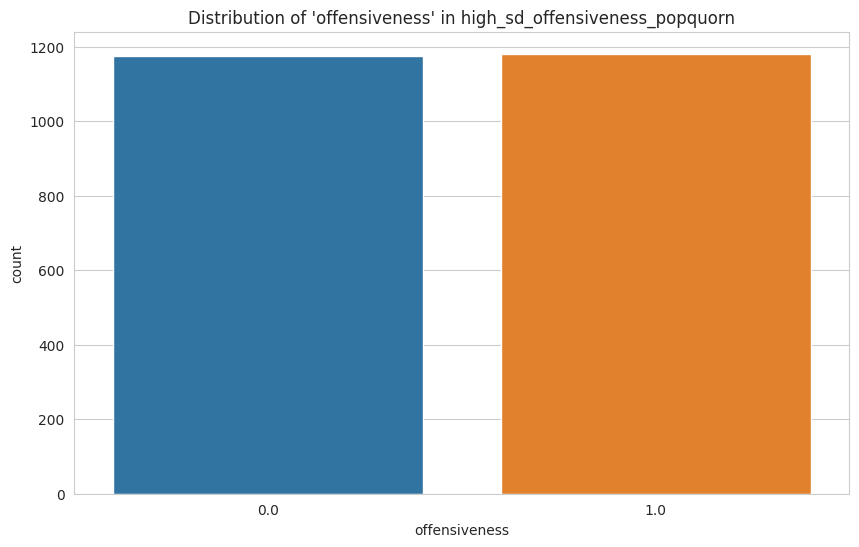

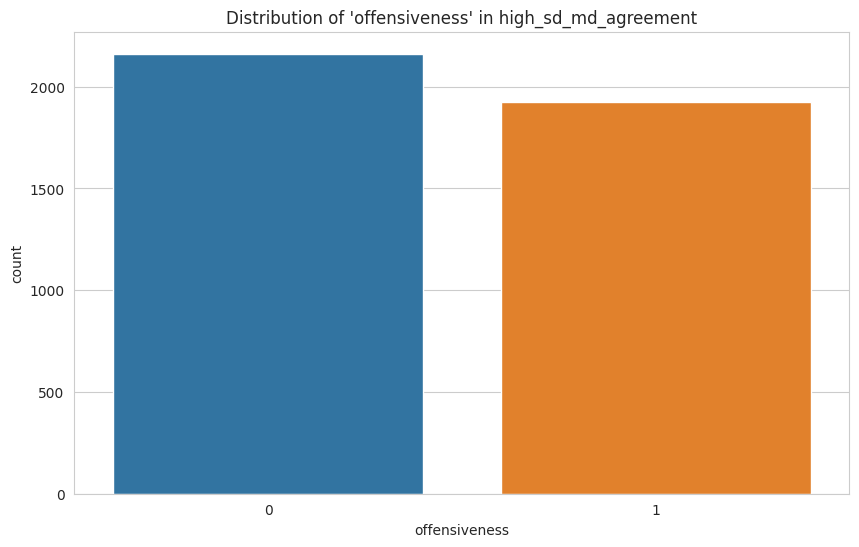

In [ ]:
plot_grouped_offensiveness_distribution(high_sd_offensiveness_popquorn, 'high_sd_offensiveness_popquorn')
plot_grouped_offensiveness_distribution(high_sd_md_agreement, 'high_sd_md_agreement')

# Save cleaned files for subsets

In [ ]:
high_sd_md_agreement.to_csv("high_sd_md_agreement.csv", index=False)
high_sd_offensiveness_popquorn.to_csv("high_sd_offensiveness_popquorn.csv", index=False)